<a href="https://colab.research.google.com/github/DhruvishaJaiswal/GitHubTest/blob/main/YoLov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"dhruvishajaiswal","key":"a685f91322b87f22f35f58f24005f5dc"}'}

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle competitions download -c global-wheat-detection

100% 605M/607M [00:29<00:00, 25.0MB/s]
100% 607M/607M [00:29<00:00, 21.8MB/s]


In [10]:
! mkdir wheatdataset

In [11]:
! unzip global-wheat-detection.zip -d wheatdataset

Archive:  global-wheat-detection.zip
  inflating: wheatdataset/sample_submission.csv  
  inflating: wheatdataset/test/2fd875eaa.jpg  
  inflating: wheatdataset/test/348a992bb.jpg  
  inflating: wheatdataset/test/51b3e36ab.jpg  
  inflating: wheatdataset/test/51f1be19e.jpg  
  inflating: wheatdataset/test/53f253011.jpg  
  inflating: wheatdataset/test/796707dd7.jpg  
  inflating: wheatdataset/test/aac893a91.jpg  
  inflating: wheatdataset/test/cb8d261a3.jpg  
  inflating: wheatdataset/test/cc3532ff6.jpg  
  inflating: wheatdataset/test/f5a1f0358.jpg  
  inflating: wheatdataset/train.csv  
  inflating: wheatdataset/train/00333207f.jpg  
  inflating: wheatdataset/train/005b0d8bb.jpg  
  inflating: wheatdataset/train/006a994f7.jpg  
  inflating: wheatdataset/train/00764ad5d.jpg  
  inflating: wheatdataset/train/00b5c6764.jpg  
  inflating: wheatdataset/train/00b5fefed.jpg  
  inflating: wheatdataset/train/00b70a919.jpg  
  inflating: wheatdataset/train/00e903abe.jpg  
  inflating: wheatdat

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tqdm.auto import tqdm
import shutil as sh

import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
!git clone https://github.com/AIVenture0/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 779, done.
remote: Total 779 (delta 0), reused 0 (delta 0), pack-reused 779
Receiving objects: 100% (779/779), 3.37 MiB | 35.20 MiB/s, done.
Resolving deltas: 100% (514/514), done.


In [14]:
!ls -R

.:
 global-wheat-detection.zip   kaggle.json   wheatdataset   yolov5
'kaggle (1).json'	      sample_data   wheat.yaml	   yolov5x.yaml

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md

./wheatdataset:
sample_submission.csv  test  train  train.csv

./wheatdataset/test:
2fd875eaa.jpg  51b3e36ab.jpg  53f253011.jpg  aac893a91.jpg  cc3532ff6.jpg
348a992bb.jpg  51f1be19e.jpg  796707dd7.jpg  cb8d261a3.jpg  f5a1f0358.jpg

./wheatdataset/train:
00333207f.jpg  37191de77.jpg  692570572.jpg  9bbee18cc.jpg  ccf5706ef.jpg
005b0d8bb.jpg  371f6d5b0.jpg  69286a6cc.jpg  9bc09acf1.jpg  ccfff0629.jpg
006a994f7.jpg  372d12c55.jpg  69352f3fa.jpg  9bccf7e53.jpg  cd243b0b0.jpg
00764ad5d.jpg  3733d0e53.jpg  6939a6e17.jpg  9bedf6645.jpg  cd2578a38.jpg
00b5c6764.jpg  3738685a3.jpg  69595016d.jpg  9c01f3217.jpg  cdc68ad10.jpg
00b5fefed.jpg  3741873d5.jpg  695ae4a12.jpg  9c0466c9f.jpg  cdd3bc83b.jpg
00b70a919.jpg  3744f24

In [15]:
!mv yolov5/* ./

In [16]:
!ls

 data			     'kaggle (1).json'	 sample_data	  wheatdataset
 detect.py		      kaggle.json	 test.py	  wheat.yaml
 Dockerfile		      LICENSE		 train.py	  yolov5
 global-wheat-detection.zip   models		 tutorial.ipynb   yolov5x.yaml
 hubconf.py		      README.md		 utils
 inference		      requirements.txt	 weights


In [17]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-n6ctf37c
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-n6ctf37c
     |████████████████████████████████| 20.3 MB 593 kB/s 
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=265171 sha256=979cd651deb577b5f833ce81d0cce3a0f3d98e1343c10ba2b54a84ed3df64bfd
  Stored in directory: /tmp/pip-ephem-wheel-cache-u0ayf3ts/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.6
    Uninstalling pycocotools-2.0.6:
      Successfully uninstalled pycocotools-2.0.6
ERROR: 

In [18]:
#DIR_INPUT = '/kaggle/input/global-wheat-detection'
DIR_TRAIN = f'/content/wheatdataset/train'
DIR_TEST = f'/content/wheatdataset/test'

In [19]:
df = pd.read_csv(f'/content/wheatdataset/train.csv')
df.shape

(147793, 5)

In [20]:
df = pd.read_csv(f'/content/wheatdataset/train.csv')
bboxs = np.stack(df['bbox'].apply(lambda x: np.fromstring(x[1:-1], sep=',')))
for i, column in enumerate(['x', 'y', 'w', 'h']):
    df[column] = bboxs[:,i]
df.drop(columns=['bbox'], inplace=True)
df['x_center'] = df['x'] + df['w']/2
df['y_center'] = df['y'] + df['h']/2
df['classes'] = 0
from tqdm.auto import tqdm
import shutil as sh
df = df[['image_id','x', 'y', 'w', 'h','x_center','y_center','classes']]

In [21]:
df.head()

,image_id,x,y,w,h,x_center,y_center,classes
0,b6ab77fd7,834.0,222.0,56.0,36.0,862.0,240.0,0
1,b6ab77fd7,226.0,548.0,130.0,58.0,291.0,577.0,0
2,b6ab77fd7,377.0,504.0,74.0,160.0,414.0,584.0,0
3,b6ab77fd7,834.0,95.0,109.0,107.0,888.5,148.5,0
4,b6ab77fd7,26.0,144.0,124.0,117.0,88.0,202.5,0


In [22]:
index = list(set(df.image_id))
len(index)

3373

In [23]:
from IPython.display import Image, clear_output

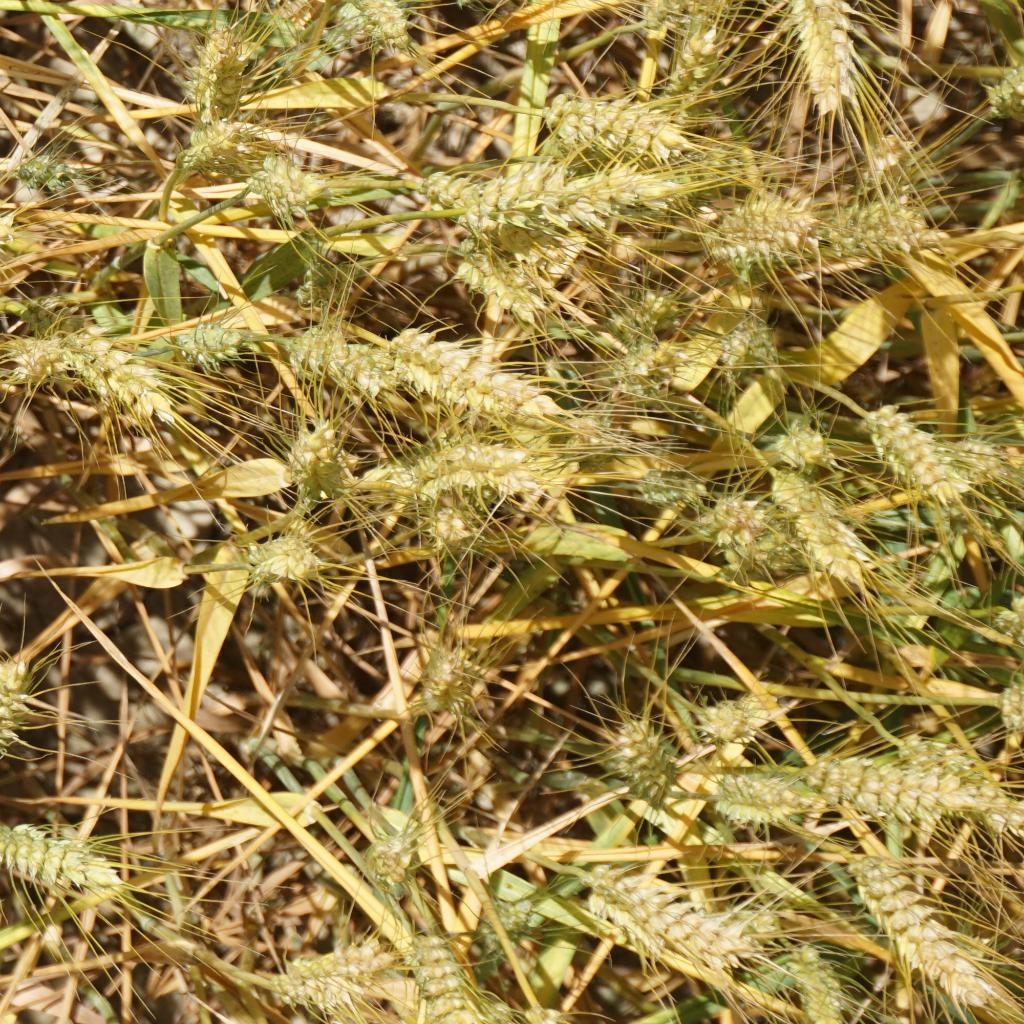

In [24]:
Image(filename='/content/wheatdataset/train/00333207f.jpg',width=600)

In [25]:
source = 'train'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('convertor/fold{}/labels/'.format(fold)+path2save)
            with open('convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row/1024
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('convertor/fold{}/images/{}'.format(fold,path2save))
            sh.copy('/content/wheatdataset/{}/{}.jpg'.format(source,name),'convertor/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))

  0%|          | 0/3373 [00:00<?, ?it/s]

In [ ]:
!ls

convertor		    hubconf.py	 README.md	   tutorial.ipynb
data			    inference	 requirements.txt  utils
detect.py		    kaggle.json  sample_data	   weights
Dockerfile		    LICENSE	 test.py	   wheatdataset
global-wheat-detection.zip  models	 train.py	   yolov5


In [ ]:
print(os.listdir("/content/"))

['.config', 'tutorial.ipynb', 'weights', 'models', 'detect.py', 'wheatdataset', 'convertor', 'hubconf.py', 'utils', 'requirements.txt', 'LICENSE', 'train.py', 'Dockerfile', 'test.py', 'global-wheat-detection.zip', 'yolov5', 'data', 'README.md', 'kaggle.json', 'inference', 'sample_data']


In [ ]:
print(os.listdir("/content/models/"))

['__init__.py', 'yolo.py', 'onnx_export.py', 'common.py', 'yolov3-spp.yaml', 'experimental.py', 'yolov5s.yaml', 'yolov5x.yaml', 'yolov5m.yaml', 'yolov5l.yaml']


In [ ]:
print(os.listdir("/content/data/"))

['get_coco2017.sh', 'coco128.yaml', 'coco.yaml']


In [ ]:
print(os.listdir("/content/yolov5/"))

['.git', '.gitignore', '.github', '.dockerignore']


In [ ]:
print(os.listdir("../content"))

['.config', 'tutorial.ipynb', 'weights', 'models', 'detect.py', 'wheatdataset', 'convertor', 'hubconf.py', 'utils', 'requirements.txt', 'LICENSE', 'train.py', 'Dockerfile', '__pycache__', 'test.py', 'global-wheat-detection.zip', 'yolov5', 'data', 'README.md', 'kaggle.json', 'inference', 'sample_data']


In [27]:
! pip install tree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 6.0 MB/s 
  Created wheel for tree: filename=Tree-0.2.4-py3-none-any.whl size=7873 sha256=4ddeeb23487c20c705f9f57cfe0cefcdaf5dbde6da1fe2e5ca6f86c784a2b9e1
  Stored in directory: /root/.cache/pip/wheels/64/46/53/3a413f321c09b0df8d4a26edd5fc3501c6c1b238497d166638
Successfully built tree


In [28]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-i87kmqb9
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-i87kmqb9


In [30]:
pip install torch==1.7.0+cu110 torchvision==0.8.1+cu110 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████▌        | 834.1 MB 64.1 MB/s eta 0:00:05tcmalloc: large alloc 1147494400 bytes == 0x399ec000 @  0x7f4c98051615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████████████████████████████▊  | 1055.7 MB 9.0 MB/s eta 0:00:10tcmalloc: large alloc 1434370048 bytes == 0x7e042000 @  0x7f4c98051615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████

In [31]:
!python train.py --img 640 --batch 2 --epochs 1 --data /content/wheat.yaml --cfg /content/yolov5x.yaml --name yolov5x_fold0_new

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=2, bucket='', cache_images=False, cfg='/content/yolov5x.yaml', data='/content/wheat.yaml', device='', epochs=1, evolve=False, img_size=[640], multi_scale=False, name='yolov5x_fold0_new', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/compat/__init__.py", line 42, in tf
    from tensorboard.compat import notf  # noqa: F401
ImportError: cannot import name 'notf' from 

In [32]:
%ls weights/

download_weights.sh*  last_yolov5x_fold0_new.pt


In [33]:
!ls ./convertor

fold0


In [34]:
!python ./detect.py --weights ./weights/last_yolov5x_fold0_new.pt --img 640 --conf 0.4 --source ./convertor/fold0/images/val2017

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='./convertor/fold0/images/val2017', view_img=False, weights='./weights/last_yolov5x_fold0_new.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

image 1/674 convertor/fold0/images/val2017/00333207f.jpg: 640x640 6 wheats, Done. (0.047s)
image 2/674 convertor/fold0/images/val2017/006a994f7.jpg: 640x640 23 wheats, Done. (0.045s)
image 3/674 convertor/fold0/images/val2017/00764ad5d.jpg: 640x640 32 wheats, Done. (0.045s)
image 4/674 convertor/fold0/images/val2017/010c93b99.jpg: 640x640 24 wheats, Done. (0.034s)
image 5/674 convertor/fold0/images/val2017/01189a3c3.jpg: 640x640 43 wheats, Done. (0.034s)
image 6/674 convertor/fold0/images/val2017/013669953.jpg: 640x640 15 wheats, Done. (0.034s)
image 7/674 convertor/fold0/images/val2017/02992044c.jpg: 640x640 15 wheats, Done. (0.034

In [35]:
!ls /content/inference/output

00333207f.jpg  34df9ca13.jpg  68fa4a555.jpg  9adbfe503.jpg  ce7375bad.jpg
006a994f7.jpg  3712db803.jpg  69041dcff.jpg  9b58d4c4e.jpg  ce803c694.jpg
00764ad5d.jpg  371f6d5b0.jpg  692570572.jpg  9c01f3217.jpg  cf1fc081c.jpg
010c93b99.jpg  372d12c55.jpg  696530284.jpg  9c05c8d56.jpg  cf3ebbedd.jpg
01189a3c3.jpg  3738685a3.jpg  69662aa1c.jpg  9cd2ec689.jpg  cf770a944.jpg
013669953.jpg  375a4795b.jpg  69d37b0ba.jpg  9d9b579c6.jpg  cff6e4b78.jpg
02992044c.jpg  376689e0c.jpg  6a2eac670.jpg  9e29f753b.jpg  d006084f3.jpg
034090252.jpg  37bcaaeb6.jpg  6a888dbcf.jpg  9eeec6b45.jpg  d011146e3.jpg
03ad2a35c.jpg  37e705df9.jpg  6a9534cf5.jpg  9f5a0c829.jpg  d01b29b85.jpg
0424c00e4.jpg  37f88c75e.jpg  6b2a72b4f.jpg  a024116dc.jpg  d0e1c00bf.jpg
0435654cd.jpg  382bf4ed7.jpg  6c31301ae.jpg  a06a8b39f.jpg  d17efcdba.jpg
04981ca30.jpg  3842535e1.jpg  6c66bb62d.jpg  a1092f6d4.jpg  d1cb278c3.jpg
05dfa9bb1.jpg  386e36c35.jpg  6ca4eaf5b.jpg  a119a31fb.jpg  d1effa7a5.jpg
060fd0cd8.jpg  3940de6a5.jpg  6cecd54f

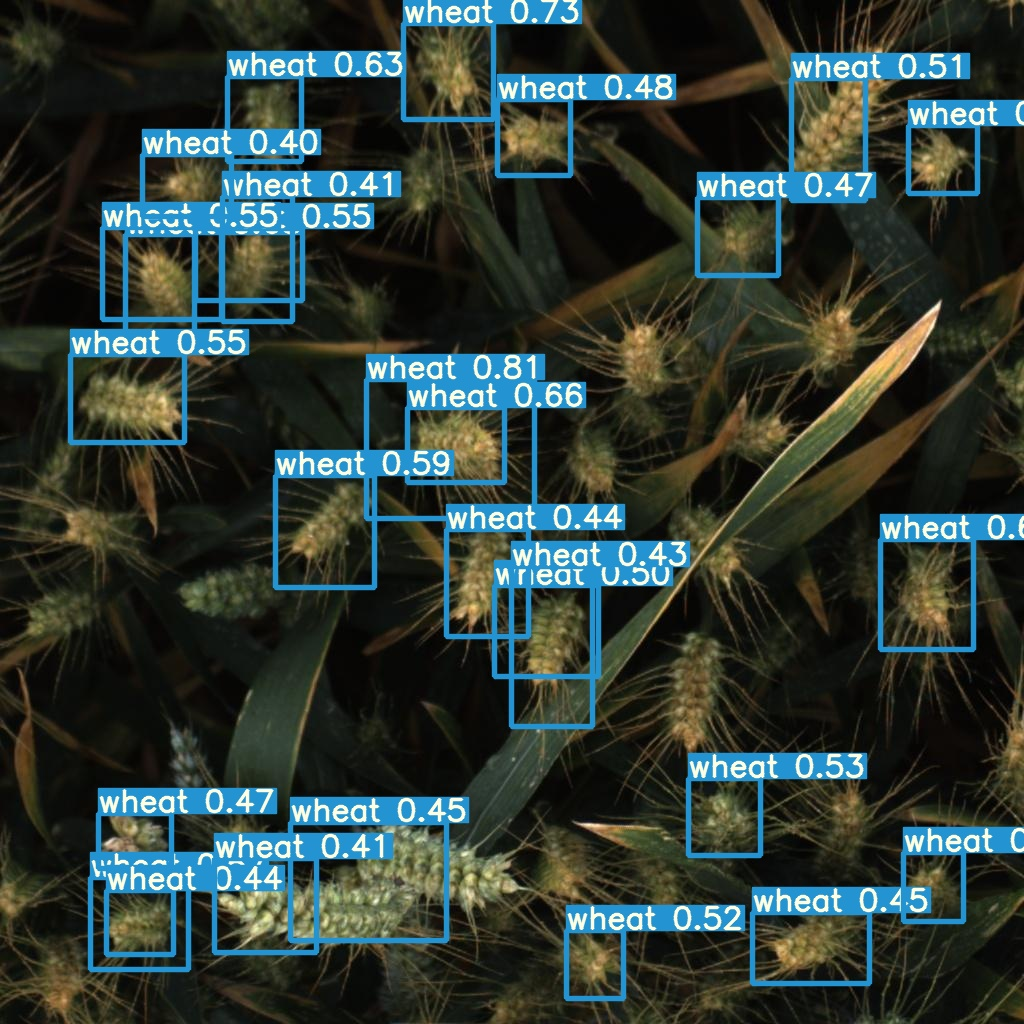

In [41]:
Image(filename='/content/inference/output/229716799.jpg', width=400)

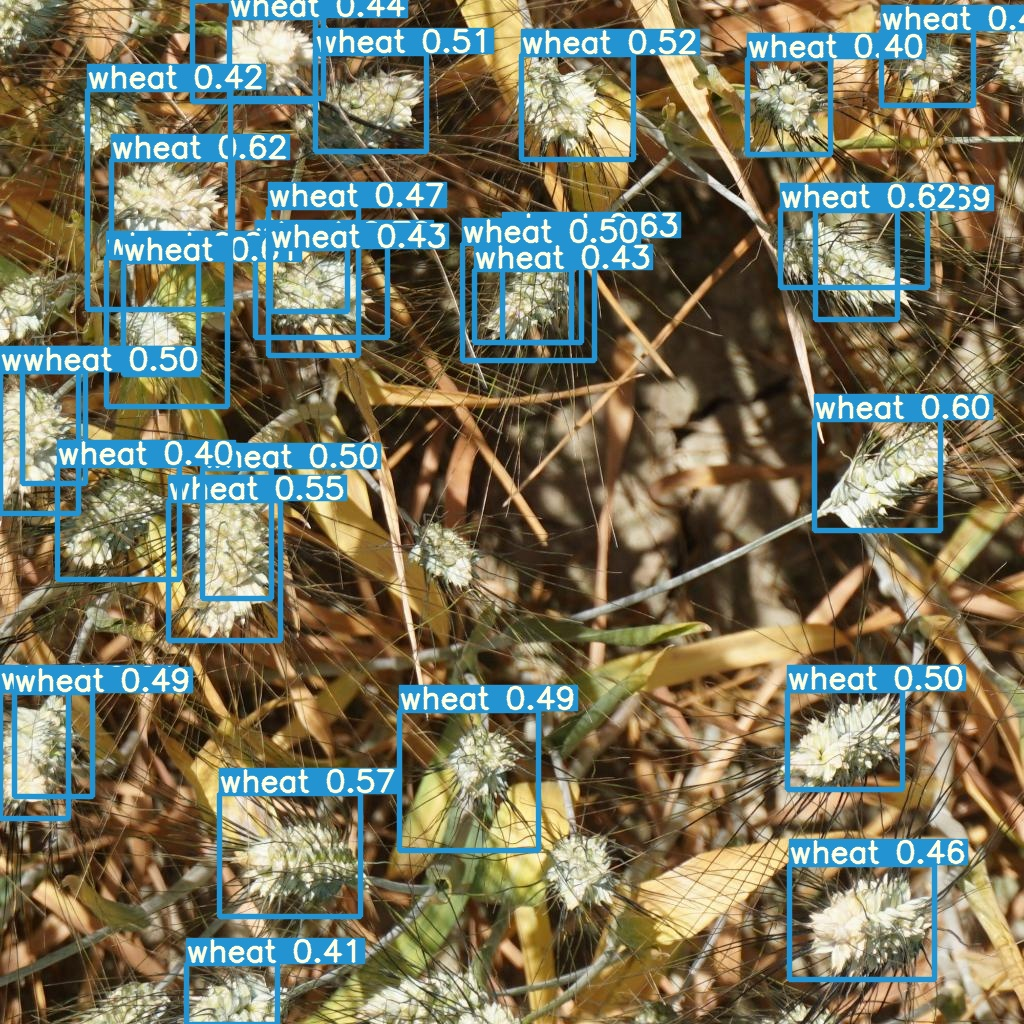

In [44]:
Image(filename='/content/inference/output/96fa7bbcb.jpg', width=400)